<a href="https://colab.research.google.com/github/GrowToo/BusinessLogic/blob/master/Dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()

Saving MAL-anime.csv to MAL-anime (1).csv


Форма датасету: (12774, 10)

--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12774 entries, 0 to 12773
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12774 non-null  int64  
 1   Title       12774 non-null  object 
 2   Rank        12774 non-null  int64  
 3   Type        12774 non-null  object 
 4   Episodes    12774 non-null  object 
 5   Aired       12774 non-null  object 
 6   Members     12774 non-null  int64  
 7   page_url    12774 non-null  object 
 8   image_url   12774 non-null  object 
 9   Score       12774 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 998.1+ KB
None

--- df.describe() ---
              count          mean            std     min      25%     50%  \
Unnamed: 0  12774.0   6386.500000    3687.680504    0.00  3193.25  6386.5   
Rank        12774.0   6397.824409    3690.509535    1.00  3204.25  6399.5   
Members     12774.0  70807.44

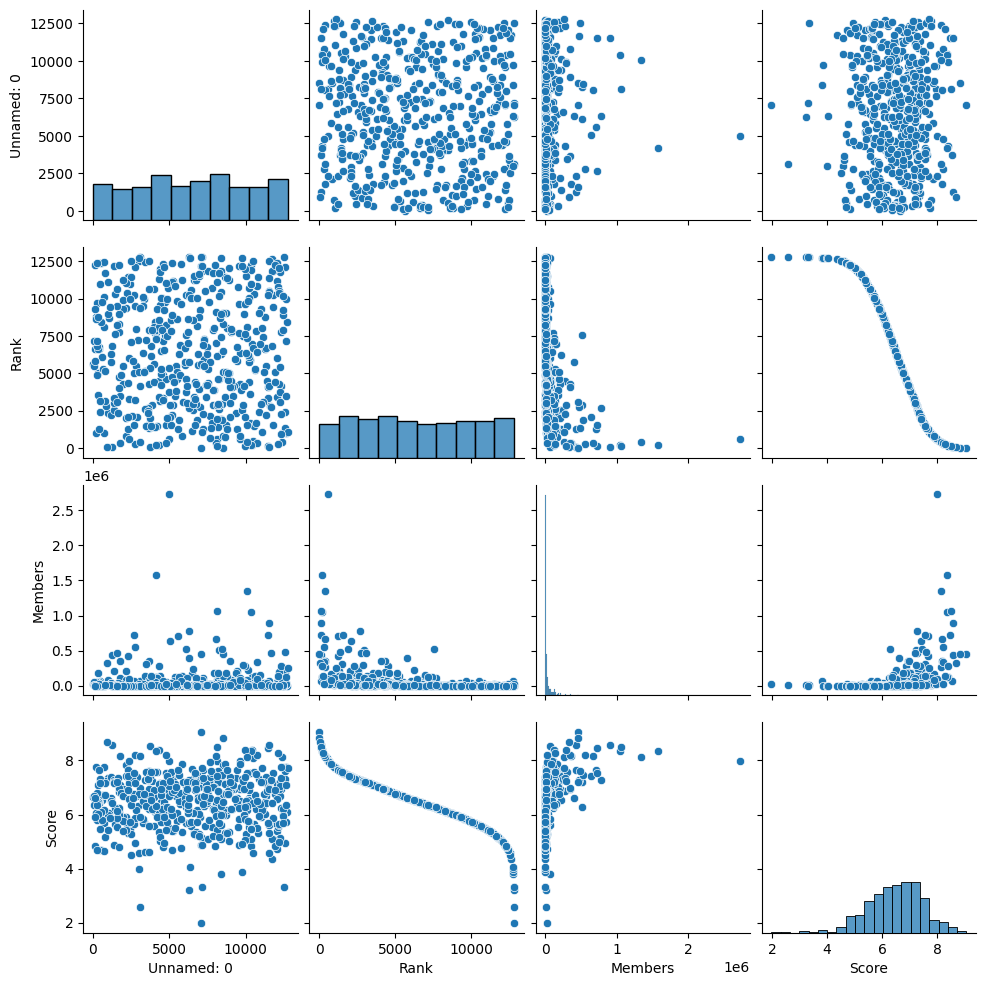


Колонка 'Title' має 12774 категорій. Приклади: ['Net-juu no Susume' 'Neon Genesis Evangelion: The End of Evangelion'
 'Templex' 's.CRY.ed' 'Toaru Majutsu no Index-tan III' 'Hana to Mogura'
 'Drifters (OVA): Kokuou-sama Goranshin' 'Himitsukessha Taka no Tsume'
 'Nyanpire The Animation' '.hack//Intermezzo']

Колонка 'Type' має 6 категорій. Приклади: ['TV' 'Movie' 'Special' 'ONA' 'OVA' 'Unknown']

Колонка 'Episodes' має 193 категорій. Приклади: ['10' '1' '26' '2' '11' '12' '24' '25' '44' '23']

Колонка 'Aired' має 3631 категорій. Приклади: ['Oct 2017 - Dec 2017' 'Jul 1997 - Jul 1997' '2015 - 2015'
 'Jul 2001 - Dec 2001' 'Dec 2018 - Apr 2019' '1970 - 1970'
 'Dec 2017 - Dec 2017' 'Apr 2006 - Jun 2006' 'Jul 2011 - Sep 2011'
 'Mar 2003 - Mar 2003']

Колонка 'page_url' має 12774 категорій. Приклади: ['https://myanimelist.net/anime/36038/Net-juu_no_Susume'
 'https://myanimelist.net/anime/32/Neon_Genesis_Evangelion__The_End_of_Evangelion'
 'https://myanimelist.net/anime/40721/Templex'
 'https:/

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Завантаження датасету
df = pd.read_csv("MAL-anime.csv")

# Інформація про дані
print("Форма датасету:", df.shape)
print("\n--- df.info() ---")
print(df.info())
print("\n--- df.describe() ---")
print(df.describe(include=[np.number]).T)

# Перші рядки
print("\n--- df.head() ---")
print(df.head())

# Попарні залежності числових змінних (візьмемо перші 6 числових, щоб не було перевантаження)
numeric_cols = df.select_dtypes(include=[np.number]).columns[:6]
sns.pairplot(df[numeric_cols].dropna().sample(min(500, len(df)), random_state=42))
plt.show()

# Категоріальні змінні та їх категорії
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for c in cat_cols:
    print(f"\nКолонка '{c}' має {df[c].nunique()} категорій. Приклади:", df[c].unique()[:10])


In [10]:
# Кількість пропущених значень
print(df.isna().sum().sort_values(ascending=False).head(20))

# Створимо копію
df_clean = df.copy()

# Заповнення числових (середнє)
for col in df_clean.select_dtypes(include=[np.number]).columns:
    df_clean[col].fillna(df_clean[col].mean(), inplace=True)

# Заповнення категоріальних (мода)
for col in df_clean.select_dtypes(include=['object', 'category']).columns:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

print("\nПропущених значень після обробки:", df_clean.isna().sum().sum())


Unnamed: 0    0
Title         0
Rank          0
Type          0
Episodes      0
Aired         0
Members       0
page_url      0
image_url     0
Score         0
dtype: int64

Пропущених значень після обробки: 0


/tmp/ipython-input-3945889468.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)
/tmp/ipython-input-3945889468.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_scaled = df_clean.copy()

# Визначимо які змінні ~нормальні (skew < 0.5), а які ні
skewness = df_scaled.select_dtypes(include=[np.number]).skew()
std_cols = skewness[skewness.abs() < 0.5].index
mm_cols = skewness[skewness.abs() >= 0.5].index

# Масштабування
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

df_scaled[std_cols] = scaler_std.fit_transform(df_scaled[std_cols])
df_scaled[mm_cols] = scaler_mm.fit_transform(df_scaled[mm_cols])

print("До масштабування:\n", df_clean[std_cols[:3]].head())
print("\nПісля масштабування:\n", df_scaled[std_cols[:3]].head())


До масштабування:
    Unnamed: 0   Rank  Score
0           0   1568   7.55
1           1     99   8.55
2           2  11445   5.29
3           3   2248   7.36
4           4   6679   6.44

Після масштабування:
    Unnamed: 0      Rank     Score
0   -1.731915 -1.308766  1.140646
1   -1.731644 -1.706830  2.202039
2   -1.731373  1.367663 -1.258104
3   -1.731102 -1.124502  0.938981
4   -1.730830  0.076192 -0.037501


In [12]:
# OneHot для тих, що мають <= 10 категорій
low_card = [c for c in df_scaled.select_dtypes(include=['object']).columns if df_scaled[c].nunique() <= 10]

# Інші кодуємо через частоту
high_card = [c for c in df_scaled.select_dtypes(include=['object']).columns if df_scaled[c].nunique() > 10]

# OneHot
df_encoded = pd.get_dummies(df_scaled, columns=low_card, drop_first=True)

# High-card: frequency encoding
for c in high_card:
    freq = df_encoded[c].value_counts(normalize=True)
    df_encoded[c] = df_encoded[c].map(freq)

# Перевірка
print("Залишилися нечислові колонки:", df_encoded.select_dtypes(exclude=[np.number]).columns.tolist())


Залишилися нечислові колонки: ['Type_ONA', 'Type_OVA', 'Type_Special', 'Type_TV', 'Type_Unknown']


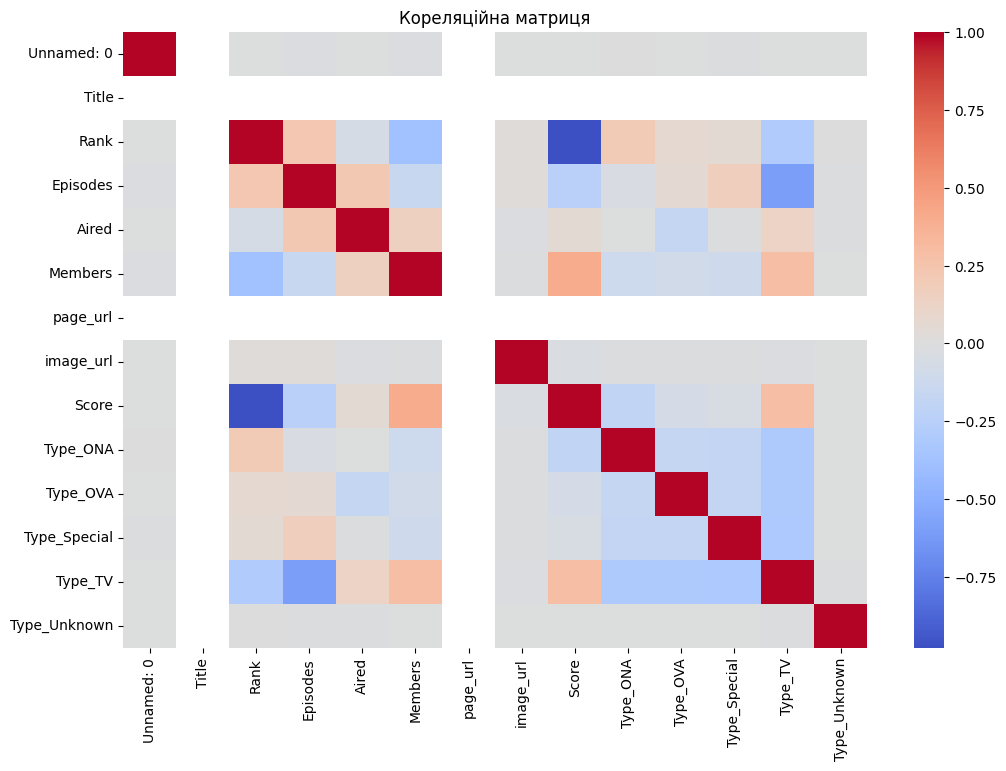

Топ-10 корельованих змінних із Unnamed: 0
Episodes        0.012570
Members         0.012298
Type_ONA        0.009618
Type_Special    0.005013
Aired           0.003511
Type_TV         0.003269
Type_OVA        0.002806
image_url       0.002777
Score           0.002365
Type_Unknown    0.000304
Name: Unnamed: 0, dtype: float64

Пари з сильною кореляцією (>|0.8|): [('Rank', 'Score', np.float64(-0.977151410784732))]


In [13]:
# Припустимо, цільова змінна — "score"
target = "score" if "score" in df_encoded.columns else df_encoded.select_dtypes(include=[np.number]).columns[0]

# Матриця кореляцій
corr = df_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Кореляційна матриця")
plt.show()

# Найсильніше пов’язані з target
print("Топ-10 корельованих змінних із", target)
print(corr[target].abs().sort_values(ascending=False)[1:11])

# Виявлення мультиколінеарності
high_corr = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i,j]) > 0.8:
            high_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i,j]))

print("\nПари з сильною кореляцією (>|0.8|):", high_corr)


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Числові та категоріальні
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# Перевірка
X_transformed = pipeline.fit_transform(df)
print("Розмірність після трансформацій:", X_transformed.shape)


Розмірність після трансформацій: (12774, 42152)


In [16]:
df_fe = df_clean.copy()

# 1) Довжина назви
if "Title" in df_fe.columns:
    df_fe["title_length"] = df_fe["Title"].astype(str).apply(len)

# 2) Рік виходу з 'Aired'
if "Aired" in df_fe.columns:
    import re
    def extract_year(x):
        m = re.search(r"(19|20)\d{2}", str(x))
        return int(m.group(0)) if m else np.nan
    df_fe["aired_year"] = df_fe["Aired"].apply(extract_year)
    df_fe["anime_age"] = 2023 - df_fe["aired_year"]

# 3) Новий показник: відношення "Members" до "Score"
if "Members" in df_fe.columns and "Score" in df_fe.columns:
    df_fe["score_per_member"] = df_fe["Score"] / df_fe["Members"].replace(0, np.nan)

# Формуємо список колонок, які реально є у DataFrame
cols_to_show = [c for c in ["Title","title_length","aired_year","anime_age","score_per_member"] if c in df_fe.columns]

print(df_fe.head()[cols_to_show])


                                            Title  title_length  aired_year  \
0                               Net-juu no Susume            17      2017.0   
1  Neon Genesis Evangelion: The End of Evangelion            46      1997.0   
2                                         Templex             7      2015.0   
3                                        s.CRY.ed             8      2001.0   
4                  Toaru Majutsu no Index-tan III            30      2018.0   

   anime_age  score_per_member  
0        6.0          0.000017  
1       26.0          0.000010  
2        8.0          0.009833  
3       22.0          0.000091  
4        5.0          0.000566  
